# Sensitivity of Saturation Profile to Van Genuchten Parameters
Modelled using *Solazzi, S. G., Bodet, L., Holliger, K., & Jougnot, D. (2021). Surface‐Wave Dispersion in Partially Saturated Soils: The Role of Capillary Forces. Journal of Geophysical Research: Solid Earth, e2021JB022074*.

### Load Packages and Routines

In [1]:
#import os
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

### Plot parameters

In [2]:
# Plot parameters
plt.rc('axes',labelsize=16)
plt.rc('font',size=14)
plt.rc('xtick',labelsize='medium')
plt.rc('ytick',labelsize='medium')
plt.rc('grid', linestyle=':', linewidth=0.5)

### Input parameters

In [3]:
z = np.linspace(0, 40, 100) # depth array (m)
wt = 25                     # water table depth (m)
Swr = 0.2                   # residual water saturation

In [4]:
Swe = np.ones(len(z))
I = np.where(z<=wt)

### Sensitivity of saturation profile to Van Genuchten parameters

#### Sensitivity to pore size distribution parameter $n_{vg}$

In [5]:
n_vg_test = np.arange(1.5,2.5,0.25)
alpha_vg = 10 # inverse of pore entry pressure (m-1)

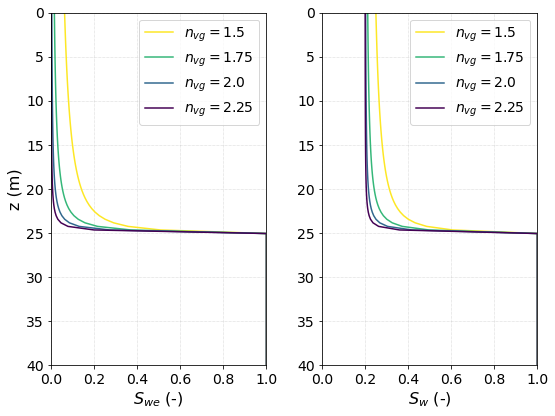

In [6]:
fig, axs = plt.subplots(1,2, figsize=(8,6))
color_map = 'viridis_r'
cmap = plt.get_cmap(color_map, len(n_vg_test))

for (i,n_vg) in enumerate(n_vg_test):
    m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
    
    Swe[I] = (1+(alpha_vg*(wt-z[I]))**n_vg)**(-m_vg) #Eq.16
    Sw = Swe*(1-Swr)+Swr #See discussion after Eq.8
    
    axs[0].plot(Swe,z,color=cmap(i), label='$n_{vg}=$'+str(n_vg))
    axs[0].set(xlabel='$S_{we}$ (-)', ylabel='z (m)')
    
    axs[1].plot(Sw,z,color=cmap(i), label='$n_{vg}=$'+str(n_vg))
    axs[1].set(xlabel='$S_w$ (-)')

for i_ax in range(0,2): 
    axs[i_ax].set(xlim=[0, 1.0], ylim=[40,0])
    axs[i_ax].grid()
    axs[i_ax].legend()
plt.tight_layout()

#### Sensitivity to pore pore entry pressure $\alpha_{vg}$

In [7]:
alpha_vg_test = np.logspace(-1,2,4)
n_vg = 1.82 # pore size distribution parameter

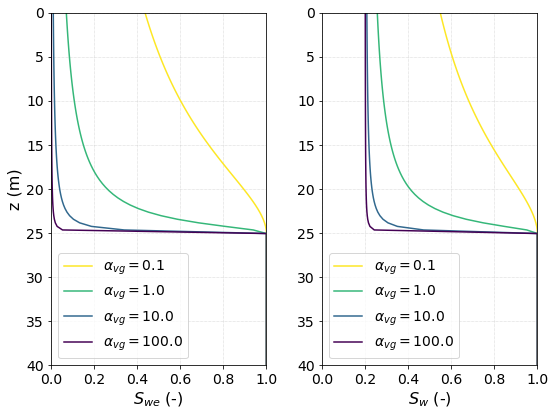

In [11]:
fig, axs = plt.subplots(1,2, figsize=(8,6))
color_map = 'viridis_r'
cmap = plt.get_cmap(color_map, len(n_vg_test))

for (i,alpha_vg) in enumerate(alpha_vg_test):
    m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
    
    Swe[I] = (1+(alpha_vg*(wt-z[I]))**n_vg)**(-m_vg) #Eq.16
    Sw = Swe*(1-Swr)+Swr #See discussion after Eq.8
    
    axs[0].plot(Swe,z,color=cmap(i), label='$\\alpha_{vg}=$'+str(alpha_vg))
    axs[0].set(xlabel='$S_{we}$ (-)', ylabel='z (m)')
    
    axs[1].plot(Sw,z,color=cmap(i), label='$\\alpha_{vg}=$'+str(alpha_vg))
    axs[1].set(xlabel='$S_w$ (-)')

for i_ax in range(0,2): 
    axs[i_ax].set(xlim=[0, 1.0], ylim=[40,0])
    axs[i_ax].grid()
    axs[i_ax].legend()
plt.tight_layout()